In [2]:
import pandas as pd
df = pd.read_csv("raw_data_P1.csv")
df.shape

(2489, 10)

In [3]:
#Ki·ªÉm tra c√°c c·ªôt c√≥ d·ªØ li·ªáu d·∫°ng s·ªë
df.select_dtypes(include=["float64", "int64"])

Di·ªán t√≠ch (m2)  Gi·∫•y t·ªù ph√°p l√Ω  S·ªë ph√≤ng ng·ªß  S·ªë ph√≤ng v·ªá sinh
0               44.0                1           2.0               1.0
1               63.0                6           2.0               2.0
2               70.0                6           2.0               2.0
3               45.0                1           3.0               5.0
4               42.0                1           3.0               NaN
...              ...              ...           ...               ...
2484            31.0                1           6.0               NaN
2485           193.0                6           4.0               3.0
2486           100.0                1           NaN               NaN
2487           142.0                6           3.0               3.0
2488            42.0                1           4.0               NaN

[2489 rows x 4 columns]

In [4]:
# Lo·∫°i b·ªè k√Ω t·ª± kh√¥ng ph·∫£i s·ªë (v√≠ d·ª•: d·∫•u ph·∫©y, kho·∫£ng tr·∫Øng)
df["Gi√° (VND)"] = df["Gi√° (VND)"].astype(str).str.replace(r"[^0-9.]", "", regex=True)

# Chuy·ªÉn sang ki·ªÉu float (√©p l·ªói th√†nh NaN n·∫øu g·∫∑p chu·ªói kh√¥ng h·ª£p l·ªá)
df["Gi√° (VND)"] = pd.to_numeric(df["Gi√° (VND)"], errors="coerce")

# Ki·ªÉm tra l·∫°i ki·ªÉu d·ªØ li·ªáu sau khi chuy·ªÉn
print(df[["Gi√° (VND)"]].dtypes)

Gi√° (VND)    int64
dtype: object


In [5]:
# Ki·ªÉm tra l·∫°i to√†n b·ªô file d·ªØ li·ªáu xem c√≤n bao nhi√™u gi√° tr·ªã NaN
df.isna().sum()

ch·ªâNg√†y ƒëƒÉng              0
Lo·∫°i h√¨nh cƒÉn h·ªô          0
Di·ªán t√≠ch (m2)            0
Gi√° (VND)                 0
Gi·∫•y t·ªù ph√°p l√Ω           0
S·ªë ph√≤ng ng·ªß            305
S·ªë ph√≤ng v·ªá sinh       1017
T√¨nh tr·∫°ng n·ªôi th·∫•t       0
Ti√™u ƒë·ªÅ                   0
ƒê·ªãa ch·ªâ                   0
dtype: int64

In [6]:
#Ki·ªÉm tra xem c√≥ bao nhi√™u b·∫£n ghi ch·ª©a d·ªØ li·ªáu NaN ·ªü lo·∫°i h√¨nh "ƒê·∫•t"
dat_df = df[df["Lo·∫°i h√¨nh cƒÉn h·ªô"].str.contains("ƒë·∫•t", case=False, na=False)]
dat_df.shape

(289, 10)

In [7]:
# X·ª≠ l√Ω gi√° tr·ªã khuy·∫øt thi·∫øu cho c·ªôt "S·ªë ph√≤ng ng·ªß" v√† "S·ªë ph√≤ng v·ªá sinh" khi lo·∫°i h√¨nh cƒÉn h·ªô l√† "ƒë·∫•t"
mask = df["Lo·∫°i h√¨nh cƒÉn h·ªô"].astype(str).str.lower() == "ƒë·∫•t"
df.loc[mask, ["S·ªë ph√≤ng ng·ªß", "S·ªë ph√≤ng v·ªá sinh"]] = 0

In [8]:
# Ki·ªÉm tra xem trong c√°c d√≤ng lo·∫°i "ƒê·∫•t" c√≤n NaN ·ªü 2 c·ªôt kh√¥ng
mask = df["Lo·∫°i h√¨nh cƒÉn h·ªô"].astype(str).str.lower().str.contains("ƒë·∫•t", na=False)
nan_check = df.loc[mask, ["S·ªë ph√≤ng ng·ªß", "S·ªë ph√≤ng v·ªá sinh"]].isna().sum()
print(nan_check)

S·ªë ph√≤ng ng·ªß        0
S·ªë ph√≤ng v·ªá sinh    0
dtype: int64


In [9]:
#Ki·ªÉm tra l·∫°i to√†n b·ªô file d·ªØ li·ªáu xem c√≤n bao nhi√™u gi√° tr·ªã NaN
df.isna().sum()

ch·ªâNg√†y ƒëƒÉng             0
Lo·∫°i h√¨nh cƒÉn h·ªô         0
Di·ªán t√≠ch (m2)           0
Gi√° (VND)                0
Gi·∫•y t·ªù ph√°p l√Ω          0
S·ªë ph√≤ng ng·ªß            16
S·ªë ph√≤ng v·ªá sinh       728
T√¨nh tr·∫°ng n·ªôi th·∫•t      0
Ti√™u ƒë·ªÅ                  0
ƒê·ªãa ch·ªâ                  0
dtype: int64

In [10]:
#T√¨m c√°c c·ªôt d·ªØ li·ªáu d·∫°ng s·ªë c√≥ ch·ª©a missing data c√≤n l·∫°i
numeric_cols = df.select_dtypes("float").columns.tolist()

df[numeric_cols].isna().sum()

Di·ªán t√≠ch (m2)        0
S·ªë ph√≤ng ng·ªß         16
S·ªë ph√≤ng v·ªá sinh    728
dtype: int64

In [11]:
#ƒêi·ªÅn c√°c gi√° tr·ªã khuy·∫øt thi·∫øu b·∫±ng median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[numeric_cols].isna().sum()/len(df)

/tmp/ipython-input-2439424278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Di·ªán t√≠ch (m2)      0.0
S·ªë ph√≤ng ng·ªß        0.0
S·ªë ph√≤ng v·ªá sinh    0.0
dtype: float64

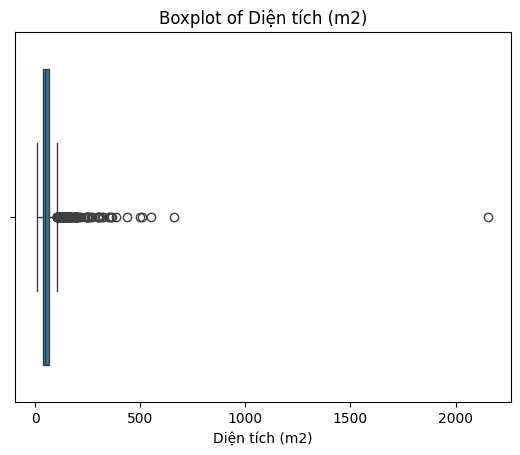

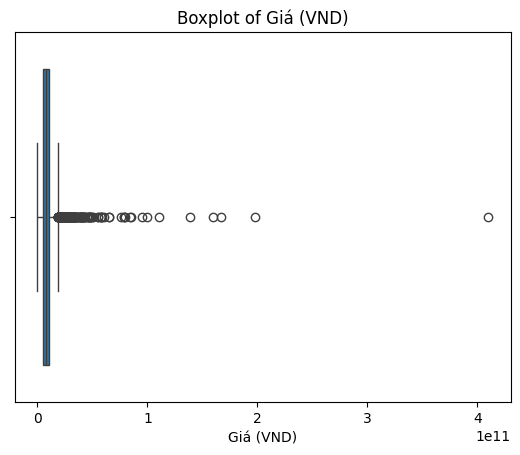

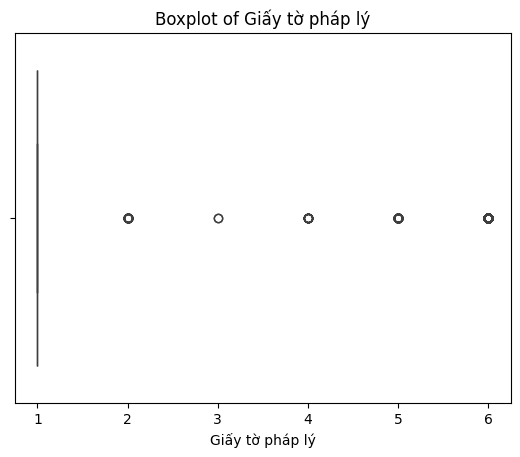

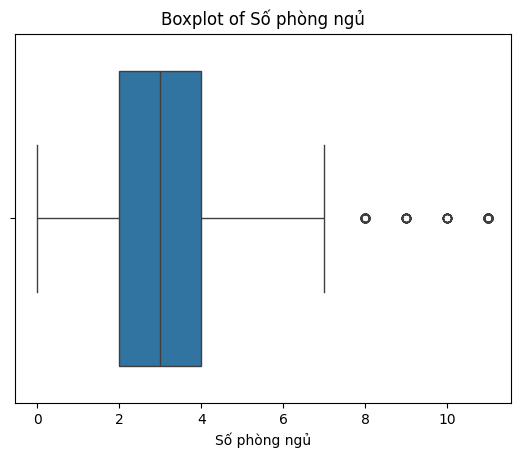

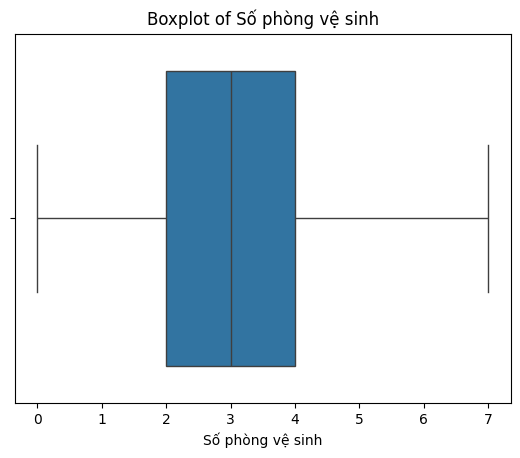

In [12]:
#V·∫Ω boxplot cho c√°c c·ªôt d·ªØ li·ªáu d·∫°ng s·ªë
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

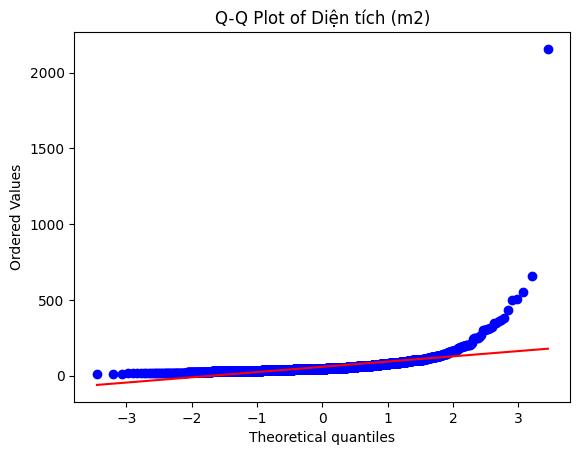

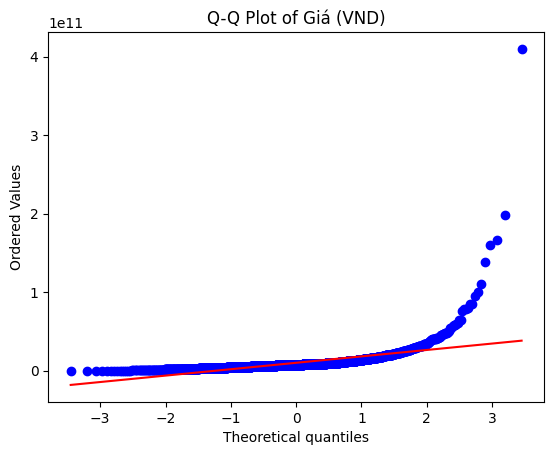

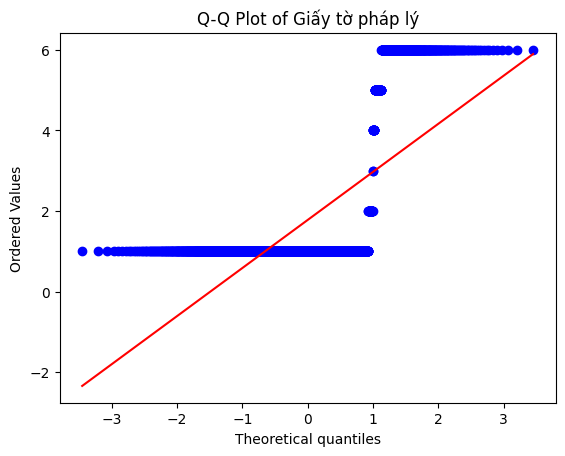

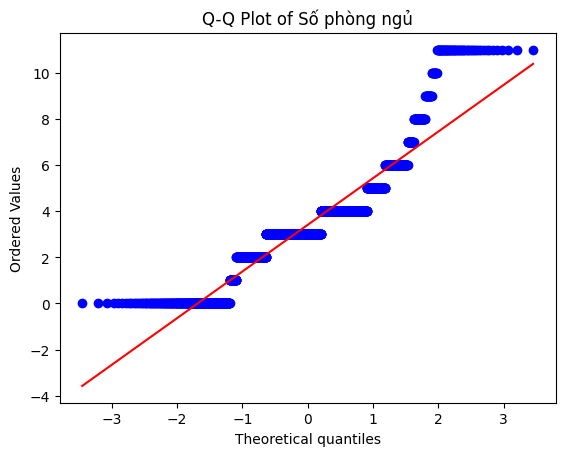

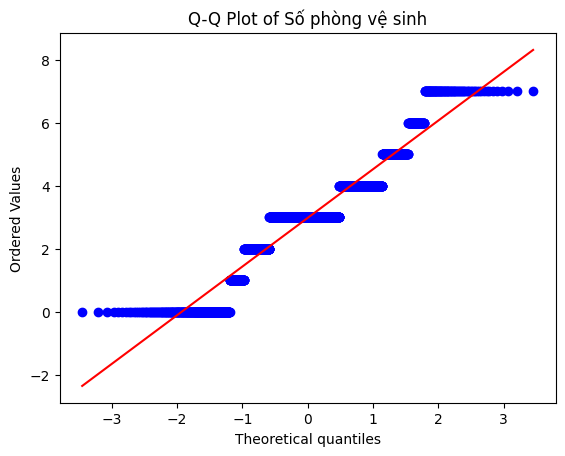

In [ ]:
#Ki·ªÉm tra ph√¢n ph·ªëi d·ªØ li·ªáu
import scipy.stats as stats
for col in numeric_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

In [13]:
# Ph√°t hi·ªán c√°c ƒëi·ªÉm d·ªØ li·ªáu outliers trong c√°c c·ªôt d·ªØ li·ªáu d·∫°ng s·ªë s·ª≠ d·ª•ng IQR
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    outlier_indices = set()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_whisker = Q1 - 1.5*IQR
        max_whisker = Q3 + 1.5*IQR
        outliers = df[(df[col]<min_whisker) | (df[col]>max_whisker)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [14]:
# G·ªçi h√†m ph√°t hi·ªán outliers
outlier_indices = detect_outliers(df)

# In ra to√†n b·ªô c√°c d√≤ng b·ªã xem l√† ngo·∫°i lai
print(df.loc[outlier_indices])

             ch·ªâNg√†y ƒëƒÉng Lo·∫°i h√¨nh cƒÉn h·ªô  Di·ªán t√≠ch (m2)    Gi√° (VND)  \
1     13/10/2025 14:21:27  CƒÉn h·ªô/Chung c∆∞            63.0   4400000000   
2     13/10/2025 14:18:42  CƒÉn h·ªô/Chung c∆∞            70.0   5550000000   
2051  11/10/2025 00:36:02            Nh√† ·ªü            60.0  39000000000   
2052  11/10/2025 00:34:22  CƒÉn h·ªô/Chung c∆∞            50.0   4600000000   
6     13/10/2025 14:15:12              ƒê·∫•t           120.0   7400000000   
...                   ...              ...             ...          ...   
2024  11/10/2025 01:09:11            Nh√† ·ªü            50.0   8600000000   
2025  11/10/2025 01:06:20            Nh√† ·ªü            60.0  21500000000   
2035  11/10/2025 00:56:32            Nh√† ·ªü            98.5  34000000000   
2036  11/10/2025 00:56:14            Nh√† ·ªü            32.0  22000000000   
2045  11/10/2025 00:39:33            Nh√† ·ªü           120.0   7500000000   

      Gi·∫•y t·ªù ph√°p l√Ω  S·ªë ph√≤ng ng·ªß  S·ª

In [ ]:
for col in df.select_dtypes(["float", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5 * IQR
    max_whisker = Q3 + 1.5 * IQR
    median = df[col].median()

    df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = median

In [ ]:
#Ki·ªÉm tra l·∫°i sau khi ƒë√£ x·ª≠ l√Ω ngo·∫°i lai b·∫±ng median
outlier_indices_after = detect_outliers(df)

if len(outlier_indices_after) == 0:
    print("D·ªØ li·ªáu kh√¥ng c√≤n gi√° tr·ªã ngo·∫°i lai.")
else:
    print(f"V·∫´n c√≤n {len(outlier_indices_after)} gi√° tr·ªã ngo·∫°i lai.")

V·∫´n c√≤n 287 gi√° tr·ªã ngo·∫°i lai.


In [15]:
for col in df.select_dtypes(["float", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5 * IQR
    max_whisker = Q3 + 1.5 * IQR
    mean = df[col].mean()

    df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean

/tmp/ipython-input-3102591303.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10154341473.224186' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean
/tmp/ipython-input-3102591303.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7778224186420248' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean


In [16]:
#Ki·ªÉm tra l·∫°i sau khi ƒë√£ x·ª≠ l√Ω ngo·∫°i lai b·∫±ng mean
outlier_indices_after = detect_outliers(df)

if len(outlier_indices_after) == 0:
    print("D·ªØ li·ªáu kh√¥ng c√≤n gi√° tr·ªã ngo·∫°i lai.")
else:
    print(f"V·∫´n c√≤n {len(outlier_indices_after)} gi√° tr·ªã ngo·∫°i lai.")

V·∫´n c√≤n 522 gi√° tr·ªã ngo·∫°i lai.
